<a href="https://colab.research.google.com/github/aryamanpathak2022/Sentimental_analysis_wn/blob/main/cluster/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
# from afinn import Afinn
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy as spacy
import numpy as np
from gensim import corpora, models
from textblob import TextBlob

In [46]:
# Load Data:

data = pd.read_csv("./drive/MyDrive/Sentiment_analysis/processed_Articles.csv")
text_column = "Processed_Article"  # Adjust based on your column name
texts = data[text_column]
headings=data["Headline"]

In [13]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [20]:
vectorizer = TfidfVectorizer()  # Adjust max_features as needed
features = vectorizer.fit_transform(texts)


In [27]:
num_topics = 100  # Adjust num_topics based on domain and desired granularity
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
# Train the model
lda.fit(features)

# Loop through topics and print topic description and top words
for i, topic in enumerate(lda.components_):
  # Give each topic a simple description based on top words (optional)
  topic_description = " ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-3:]])
  print(f"Topic #{i}: {topic_description}")
  print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]])
  print("\n")

# Get topic distribution for all documents (already done in your code)
topic_distributions = lda.transform(features)


Topic #0: favorite fascist zuma
['favored', 'favoring', 'favorite', 'fascist', 'zuma']


Topic #1: using without thing
['never', 'know', 'using', 'without', 'thing']


Topic #2: want still group
['gupta', 'united', 'want', 'still', 'group']


Topic #3: favorite fascist zuma
['favored', 'favoring', 'favorite', 'fascist', 'zuma']


Topic #4: experiencing weather extreme
['meteorological', 'heatwave', 'experiencing', 'weather', 'extreme']


Topic #5: polgreen essay audio
['lydia', 'transcript', 'polgreen', 'essay', 'audio']


Topic #6: engineer jones netravalkar
['qualified', 'computer', 'engineer', 'jones', 'netravalkar']


Topic #7: jacob karachi jacobabad
['sahiba', 'quetta', 'jacob', 'karachi', 'jacobabad']


Topic #8: blaze roy little
['baby', 'supply', 'blaze', 'roy', 'little']


Topic #9: airline feature indigo
['aboard', 'female', 'airline', 'feature', 'indigo']


Topic #10: election modi india
['indian', 'country', 'election', 'modi', 'india']


Topic #11: blackout grid aircondit

In [34]:
num_topics = 150  # Adjust num_topics based on domain and desired granularity
svd = TruncatedSVD(n_components=num_topics, random_state=42)
topic_distributions = svd.fit_transform(features)

In [35]:
ward_clusterer = AgglomerativeClustering(n_clusters=3, linkage='ward')
ward_clusterer.fit(topic_distributions)  # Use fit for training
clusters = ward_clusterer.labels_ # Use predict for assigning labels

In [40]:
# KMeans

kmeans = KMeans(n_clusters=2, random_state=42)  # Adjust n_clusters as needed
kmeans.fit(topic_distributions)
clusters = kmeans.predict(topic_distributions)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


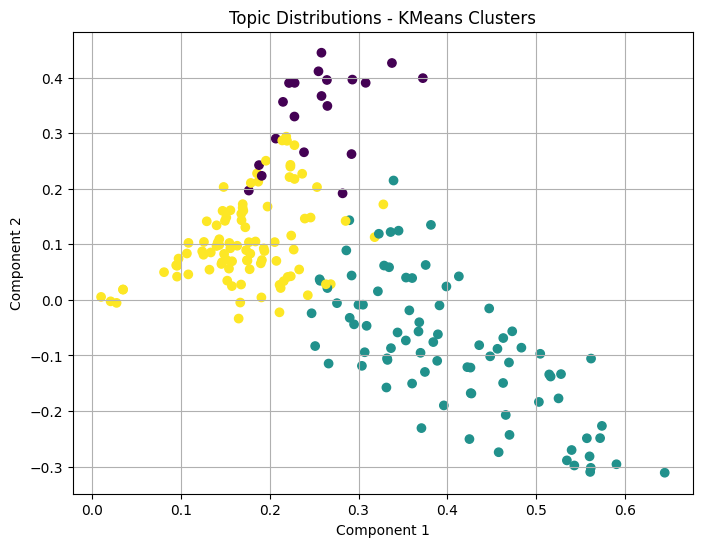

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(topic_distributions[:, 0], topic_distributions[:, 1], c=clusters)  # Adjust indexing for your data dimensions
plt.title('Topic Distributions - KMeans Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')  # Adjust labels based on your data
plt.grid(True)
plt.show()

In [62]:
# print number of each cluster
cluster_counts = Counter(clusters)
print(cluster_counts)

Counter({1: 131, 0: 67})


In [63]:
# print article and cluster corresponding
for i in range(len(clusters)):
  print(f"Article {headings[i]}: Cluster {clusters[i]}")

Article Man Accused in Plot to Assassinate Sikh Separatist Pleads Not Guilty: Cluster 0
Article Fire in Kuwait Worker Housing Leaves at Least 49 Dead: Cluster 1
Article Train Crash in India Leaves at Least 8 Dead and Dozens Injured: Cluster 1
Article G7 Leaders, Expanding the Circle, Shift Focus to Migration and the South: Cluster 1
Article At the Ambani Wedding Celebrations, a Dazzling Display of Jewels: Cluster 1
Article What Modi’s Dwindling Support Says About Democracy Worldwide: Cluster 1
Article India-Pakistan Cricket World Cup Match Brings 34,000 Fans to Long Island: Cluster 1
Article Modi, Striking a Modest Tone, Is Sworn In for a Third Term: Cluster 0
Article India’s Modi, Humbled by Voters, Faces Potent Economic Struggles: Cluster 0
Article The World Heads to the Polls: Cluster 0
Article Narendra Modi’s India: Cluster 1
Article In Global Elections, Strongmen Are Taken Down a Notch: Cluster 0
Article Rahul Gandhi, Long on the Ropes, Looks Set for an Unexpected Comeback: Cluste

In [50]:
def get_sentiment_score(text):
  """
  This function analyzes the sentiment of a text string and returns a sentiment score.

  Args:
      text: The text string to analyze sentiment for.

  Returns:
      A float between -1 (negative) and 1 (positive) representing the sentiment score of the text.
  """
  sentiment = TextBlob(text).sentiment.polarity  # Uses TextBlob sentiment analysis
  return sentiment


In [51]:
from tqdm import tqdm  # tqdm for progress bar

sentiment_scores = []
for article in tqdm(texts):
  sentiment_score = get_sentiment_score(article)  # Assuming you have the get_sentiment_score function
  sentiment_scores.append(sentiment_score)


100%|██████████| 198/198 [00:03<00:00, 53.63it/s]


In [54]:
sentiment_scores_array = np.array(sentiment_scores)
combined_features = np.concatenate((topic_distributions, sentiment_scores_array.reshape(-1, 1)), axis=1)


In [60]:
# Specify the number of desired clusters
num_clusters = 2

# Create a KMeans model with the specified number of clusters and a random state
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the KMeans model to the combined features
kmeans.fit(combined_features)

# Predict the cluster labels for each data point
clusters = kmeans.predict(combined_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


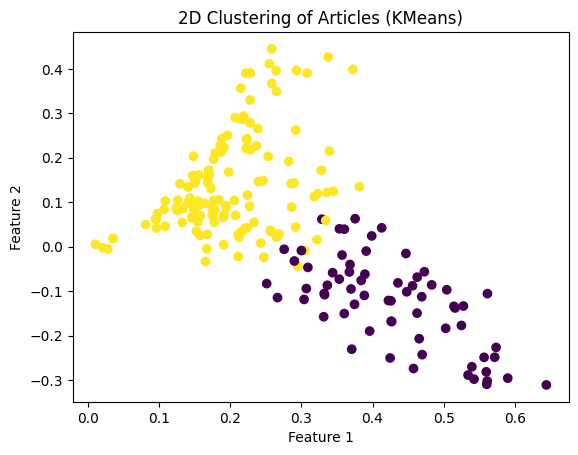

In [64]:
# Assuming 'combined_features' has two dimensions (features for x and y axes)
plt.scatter(combined_features[:, 0], combined_features[:, 1], c=clusters)  # Color by cluster label

# Add labels and title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Clustering of Articles (KMeans)")

# Optional: Add centroids (cluster centers) if available from the KMeans model
# centroids = kmeans.cluster_centers_  # Assuming centroids are accessible
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=100, c='black', label='Centroids')  # Plot centroids as black circles

plt.show()


In [77]:
from nltk.tokenize import word_tokenize

In [65]:
def extract_lexicon_features(text, sentiment_analyzer):
    """
    Extracts sentiment scores from a sentiment lexicon (VADER in this case).
    """
    scores = sentiment_analyzer.polarity_scores(text)
    return scores['compound'], scores['pos'], scores['neg'], scores['neu']

In [66]:
def extract_linguistic_features(text):
    """
    Extracts linguistic features:
    - Number of words
    - Average word length
    - Proportion of adverbs, adjectives, and nouns
    """
    words = word_tokenize(text)
    num_words = len(words)
    avg_word_length = np.mean([len(word) for word in words])

    pos_tags = nltk.pos_tag(words)
    num_adverbs = sum(1 for tag in pos_tags if tag[1] == 'RB' or tag[1] == 'RBR' or tag[1] == 'RBS')
    num_adjectives = sum(1 for tag in pos_tags if tag[1] == 'JJ' or tag[1] == 'JJR' or tag[1] == 'JJS')
    num_nouns = sum(1 for tag in pos_tags if tag[1] == 'NN' or tag[1] == 'NNS' or tag[1] == 'NNP' or tag[1] == 'NNPS')
    prop_adverbs = num_adverbs / num_words if num_words > 0 else 0
    prop_adjectives = num_adjectives / num_words if num_words > 0 else 0
    prop_nouns = num_nouns / num_words if num_words > 0 else 0

    return num_words, avg_word_length, prop_adverbs, prop_adjectives, prop_nouns

In [67]:
def extract_statistical_features(text, vectorizer):
    """
    Extracts statistical features:
    - Term frequency (TF)
    """
    tfidf_matrix = vectorizer.transform([text])
    tf_vector = tfidf_matrix.toarray()[0]
    return tf_vector

In [68]:
def extract_topic_features(text, dictionary, lda_model):
    """
    Extracts topic features using LDA.
    """
    bow = dictionary.doc2bow(text.split())
    topic_dist = lda_model[bow]  # Get topic distribution for the document
    topic_props = np.array([v[1] for v in topic_dist])  # Extract topic proportions
    return topic_props


In [71]:
sentiment_analyzer = SentimentIntensityAnalyzer()
vectorizer = TfidfVectorizer()
dictionary = corpora.Dictionary(texts.apply(lambda x: x.split()))
corpus = [dictionary.doc2bow(text.split()) for text in texts]
lda_model = models.LdaModel(corpus, id2word=dictionary, num_topics=5)  # Adjust num_topics as needed

In [72]:
lexicon_features = []
linguistic_features = []
statistical_features = []
topic_features = []

In [80]:
for text in texts:
        # Preprocess text


        # Extract lexicon features
        compound_score, pos_score, neg_score, neu_score = extract_lexicon_features(text, sentiment_analyzer)
        lexicon_features.append([compound_score, pos_score, neg_score, neu_score])

        # Extract linguistic features
        num_words, avg_word_length, prop_adverbs, prop_adjectives, prop_nouns = extract_linguistic_features(text)
        linguistic_features.append([num_words, avg_word_length, prop_adverbs, prop_adjectives, prop_nouns])
        vectorizer.fit(texts)
        # Extract statistical features
        tf_vector = extract_statistical_features(text, vectorizer)
        statistical_features.append(tf_vector)

        # Extract topic features
        topic_prop = extract_topic_features(text, dictionary, lda_model)
        topic_features.append(topic_prop)


    # Combine features
lexicon_features = np.array(lexicon_features)
linguistic_features = np.array(linguistic_features)
statistical_features = np.array(statistical_features)
topic_features = np.array(topic_features)
print(lexicon_features.shape)
print(linguistic_features.shape)
print(statistical_features.shape)
print(topic_features.shape)

# features = np.concatenate((np.array(lexicon_features), np.array(linguistic_features), statistical_features, topic_features), axis=1)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (396,) + inhomogeneous part.